In [20]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import json
import pandas as pd

import lib.baseline as baseline
from lib.util import plot_cluster_cf

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


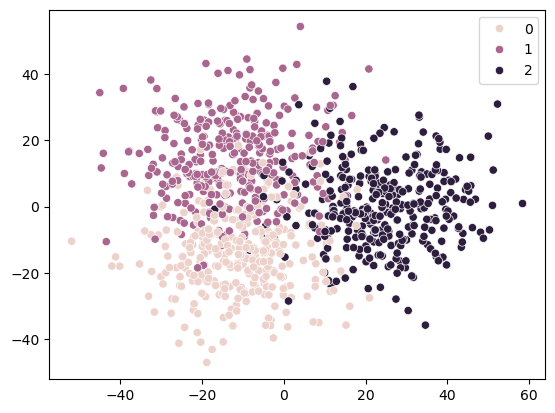

In [95]:
X, y = make_blobs(centers=3, cluster_std=12, n_features=20, n_samples=1000)
eX = PCA(n_components=2).fit_transform(X)
sns.scatterplot(x=eX[:, 0], y=eX[:, 1], hue=y)
plt.show()

In [98]:
idx = 0
print(f"init point cluster: {y[idx]}")
target_cluster = 2

init point cluster: 1


In [99]:
classifier = MLPClassifier(hidden_layer_sizes=(4,4))
# classifier = LogisticRegression()
# classifier = RandomForestClassifier()
cf = baseline.baseline_explainer(X, y, classifier, baseline.baycon_explainer, idx, target_cluster=target_cluster)

/nix/store/zfc0ci36l78c0pa9d31v8k4iz9mhbsz1-python3-3.12.8-env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Done training classifier. Score: 0.833
Found 768 counterfactuals


Data has more than 2 features. Using PCA!


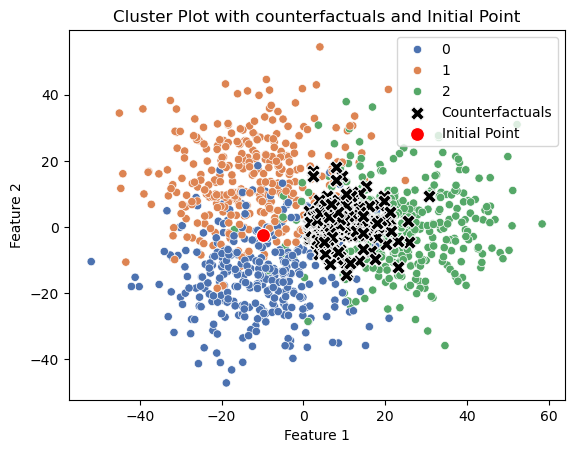

In [100]:
plot_cluster_cf(X, y, cf, idx)